In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv("data/MITRE_satellites.csv", parse_dates=True)
df['Launch Date - Actual from Launch Events'] = pd.to_datetime(df['Launch Date - Actual from Launch Events'])
df.tail(20)

,Spacecraft Name,Spacecraft Life Cycle Phase,Spacecraft Life Cycle Disposal Reason,Launch Outcome,Spacecraft Type,Spacecraft Subtype,Spacecraft Service Type,Spacecraft Missions/Payloads,Orbit Type,Primary Spacecraft on Launch,...,Launch Code,Launch Organization Name,Launch Organization Country,Integrator Name,Launch Date - Actual from Launch Events,Launch Vehicle Name,Name of Launch Site,Launch Site Country,Launch Contract Sign Date,Launch Event - Total # of Spacecraft
4074,Yunhai 2-06,Deployment,NaN,Success,Satellite,Satellite,Government-Civil,Earth Observation,SSO,No,...,2018-12-29-9253,China Aerospace Science and Technology Corpora...,China,NaN,2018-12-29,Long March 2D,Jiuquan Satellite Launch Center,China,NaN,7
4075,ZA-AeroSat (QB50 AZ01),Deployment,NaN,Success,Satellite,CubeSat,Non-Profit,Development,LEO,No,...,2017-4-18-8962,United Launch Alliance,USA,Nanoracks,2017-04-18,Atlas V 401,Cape Canaveral Space Force Station,USA,NaN,40
4076,ZACUBE 1,Disposal,Inactive,Success,Satellite,CubeSat,Non-Profit,Development,SSO,No,...,2013-11-21-7490,ISC Kosmotras,Russia,NaN,2013-11-21,Dnepr,Dombarovskiy Air Base,Russia,11/21/2011,32
4077,ZACUBE 2,Deployment,NaN,Success,Satellite,CubeSat,Non-Profit,Development,SSO,No,...,2018-12-27-9247,Russian Ministry of Defense,Russia,ISILaunch,2018-12-27,Soyuz 2.1a,Vostochny Cosmodrome,Russia,NaN,28
4078,Zafar 1,Disposal,Launch Failure,Failure,Satellite,Satellite,Non-Profit,Earth Observation: Optical,LEO,Yes,...,2020-2-9-9409,Iranian Space Agency,Iran,NaN,2020-02-09,Simorgh,Semnan Province,Iran,NaN,1
4079,ZDPS 2A,Deployment,NaN,Success,Satellite,Satellite,Non-Profit,Development,LEO,No,...,2015-9-20-8677,China Aerospace Science and Technology Corpora...,China,NaN,2015-09-20,Long March 6,Taiyuan Satellite Launch Center,China,NaN,20
4080,ZDPS 2B,Deployment,NaN,Success,Satellite,Satellite,Non-Profit,Development,LEO,No,...,2015-9-20-8677,China Aerospace Science and Technology Corpora...,China,NaN,2015-09-20,Long March 6,Taiyuan Satellite Launch Center,China,NaN,20
4081,Zhangheng 1 (CSES),Deployment,NaN,Success,Satellite,Satellite,Government-Civil,Earth Observation,SSO,Yes,...,2018-2-2-9066,China Aerospace Science and Technology Corpora...,China,NaN,2018-02-02,Long March 2D,Jiuquan Satellite Launch Center,China,NaN,7
4082,Zhaojin 1,Deployment,NaN,Success,Satellite,CubeSat,Non-Profit,Scientific,SSO,No,...,2018-10-29-9141,China Aerospace Science and Technology Corpora...,China,NaN,2018-10-29,Long March 2C,Jiuquan Satellite Launch Center,China,NaN,7
4083,Zhongdianwangtong 1A,Deployment,NaN,Success,Satellite,Satellite,Government-Civil,Development,LEO,No,...,2019-6-5-9313,China Aerospace Science and Technology Corpora...,China,NaN,2019-06-05,Long March 11,Yellow Sea Launch Platform,China,NaN,7


In [3]:
print(df.columns)

Index(['Spacecraft Name', 'Spacecraft Life Cycle Phase',
       'Spacecraft Life Cycle Disposal Reason', 'Launch Outcome',
       'Spacecraft Type', 'Spacecraft Subtype', 'Spacecraft Service Type',
       'Spacecraft Missions/Payloads', 'Orbit Type',
       'Primary Spacecraft on Launch',
       'Launch Event - Internationally Competed',
       'Operator - Organization Name', 'Operator  - Country',
       'Prime Manufacturer - Organization Name',
       'Prime Manufacturer - Country', 'Prime Manufacturer - City',
       'Prime Manufacturer - State', 'Mass Estimated', 'Mass at Launch kg',
       'Launch Code', 'Launch Organization Name',
       'Launch Organization Country', 'Integrator Name',
       'Launch Date - Actual from Launch Events', 'Launch Vehicle Name',
       'Name of Launch Site', 'Launch Site Country',
       'Launch Contract Sign Date', 'Launch Event - Total # of Spacecraft'],
      dtype='object')


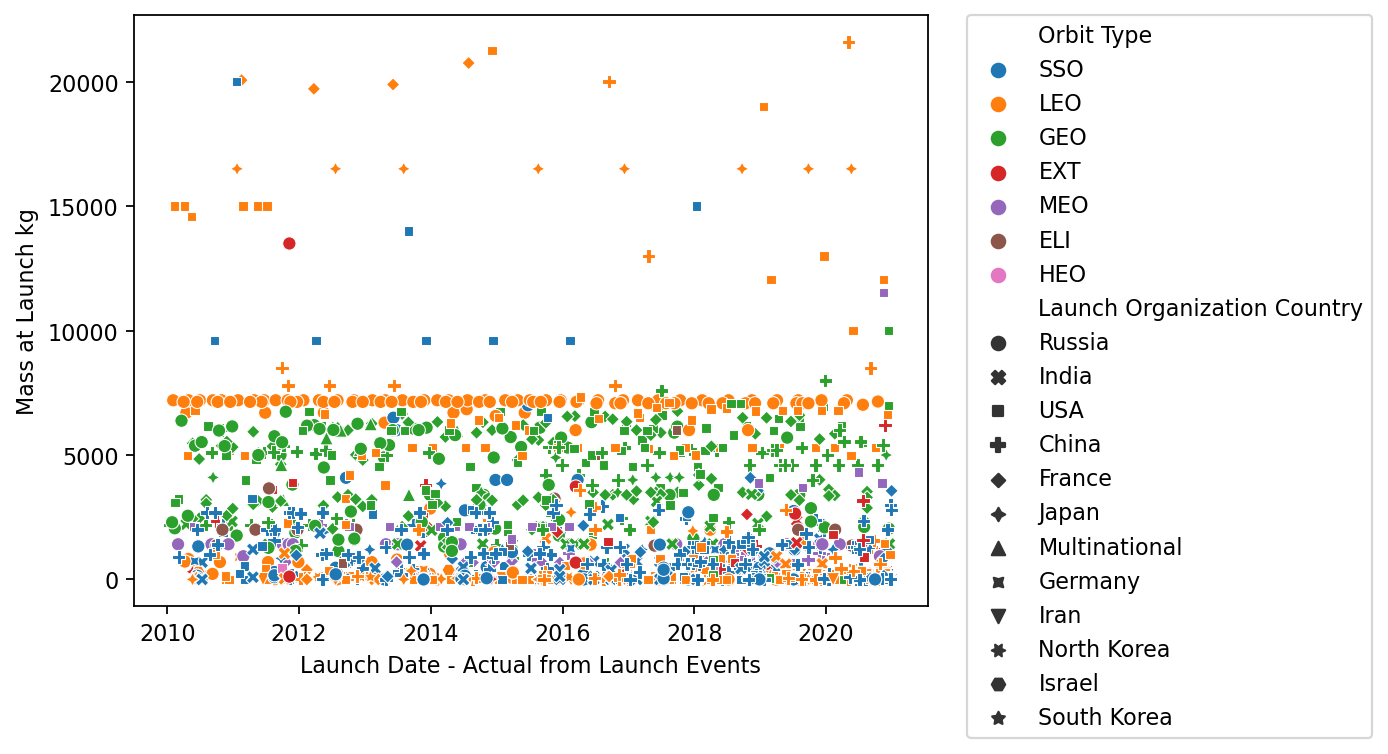

In [4]:
sns.scatterplot(df, x = 'Launch Date - Actual from Launch Events', y = 'Mass at Launch kg', 
                hue = 'Orbit Type', style = 'Launch Organization Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
fig = plt.gcf()
fig.set_dpi(160)


Text(0.5, 1.0, 'Rolling Sum of Satellite Launch Weight')

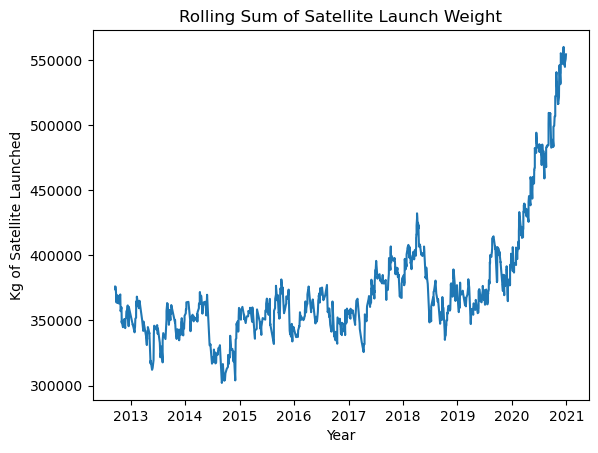

In [5]:
launch_mass = df[['Launch Date - Actual from Launch Events', 'Mass at Launch kg']]
launch_mass = launch_mass.set_index('Launch Date - Actual from Launch Events').sort_index()
plt.plot((launch_mass['Mass at Launch kg'].rolling(pd.Timedelta(360, "d")).sum())[360:])
plt.xlabel("Year")
plt.ylabel("Kg of Satellite Launched")
plt.title("Rolling Sum of Satellite Launch Weight")


In [6]:
#Let's get set of unique launch vehicles and display the top 10 (should i sort by kg launched?)
string = 'Launch Vehicle Name'
print(f'There are {len(set(df[string]))} unique launch vehicles')
print(f'{df[string].value_counts(ascending=False)[:15]}')


There are 112 unique launch vehicles
Falcon 9 Block 5           1012
PSLV XL                     264
Soyuz 2.1b                  264
Soyuz 2.1a                  204
Atlas V 401                 156
Electron                    113
Ariane 5 ECA                106
Antares 120                 103
Vega                         96
Long March 2D                93
Falcon 9 FT                  93
Falcon 9 Block 5 Dragon      89
Dnepr                        89
Proton M/Breeze-M            78
Antares 230                  70
Name: Launch Vehicle Name, dtype: int64


# Total Launch Costs Index


## 1. First we will need to create a dictionary between Platform and Cost/perKG. In the future, we will augment key with orbit type


In [35]:
mitre = pd.read_csv('data/mitre_matched_satellite.csv', index_col = 0, parse_dates=True)

launch_costs = pd.read_csv('Cost_KG/cost_per_kg_aggregated.csv', index_col = 0)
launch_costs_dict = pd.Series(launch_costs['cost_per_kg'].values, index= launch_costs['Platform']).to_dict()

print(launch_costs_dict)

{'Angaras': 4500.0, 'Antares': 13600.0, 'Ariane 44': 18300.0, 'Ariane 5G': 10200.0, 'Athena 1': 19200.0, 'Atlas Centaur': 29500.0, 'Atlas II': 18700.0, 'Atlas III': 16000.0, 'Atlas V': 8100.0, 'Delta 3000': 21400.0, 'Delta 3910': 32800.0, 'Delta E': 177900.0, 'Delta II': 38800.0, 'Delta III': 18000.0, 'Delta IV': 10400.0, 'Delta IV Heavy': 11600.0, nan: 9600.0, 'Electron': 23100.0, 'Epsilon': 34500.0, 'Falcon 1': 12600.0, 'SpaceX Falcon 9': 2600.0, 'SpaceX Falcon Heavy': 1500.0, 'GSLV': 10000.0, 'H-II': 10500.0, 'Kosmos': 14900.0, 'Kuaizhou': 10600.0, 'LVM3': 8000.0, 'Long March 11': 10600.0, 'Long March 2A': 8700.0, 'Long March 2C': 8300.0, 'Long Marche 2D': 9100.0, 'Long Marche 2E': 9900.0, 'Long March 3B': 6200.0, 'Long March 4B': 7600.0, 'Long March 5': 7900.0, 'M-V': 45800.0, 'Minotaur I': 73100.0, 'Minotaur IV': 30500.0, 'PSLV': 8500.0, 'Pegasus': 41100.0, 'Pegasus XL': 50600.0, 'Proton': 8200.0, 'R-36 / Cyclone': 8400.0, 'Rokot': 20600.0, 'Saturn V': 5400.0, 'Scout': 118500.0, '

## 2. Now, map each launch into a cost amount by transforming cost/kg with total kg of spaceflight

In [37]:
mitre['total cost'] = mitre.apply(lambda row: launch_costs_dict[row['Platform']]*row['Mass at Launch kg'] if row['Platform'] in launch_costs_dict else 0, axis = 1)
display(mitre[['Launch Vehicle Name', 'total cost', 'Spacecraft Missions/Payloads']])

,Launch Vehicle Name,total cost,Spacecraft Missions/Payloads
0,Dnepr,1440.0,Development
1,Dnepr,9600.0,Development
2,H-IIA 202,6211200.0,Scientific
3,H-IIA 202,20352000.0,Earth Observation
4,Angara A5,19603200.0,Test
...,...,...,...
4109,3110 Taurus XL,34600.0,Development
4110,Shavit 2,11818000.0,Intelligence: Imagery Intelligence (IMINT)
4111,Shavit 2,9330000.0,Intelligence: Imagery Intelligence (IMINT)
4112,Shavit 2,9330000.0,Intelligence: Imagery Intelligence (IMINT)


## 3. Finally, create a rolling sum over the cost with date as the index to get a rough version of a launch cost index

Text(0.5, 1.0, 'Index of Satellite Launch Cost')

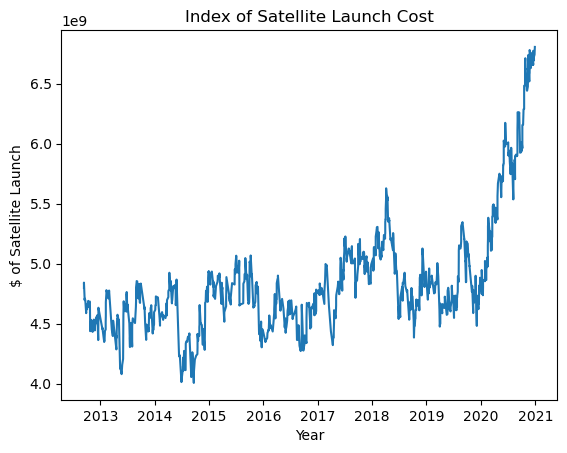

In [28]:
mitre['Launch Date - Actual from Launch Events'] = pd.to_datetime(mitre['Launch Date - Actual from Launch Events'])
launch_cost = mitre[['Launch Date - Actual from Launch Events', 'total cost']]
launch_cost = launch_cost.set_index('Launch Date - Actual from Launch Events').sort_index()
launch_index = launch_cost['total cost'].rolling(pd.Timedelta(360, "d")).sum()[360:]
plt.plot((launch_cost['total cost'].rolling(pd.Timedelta(360, "d")).sum())[360:])
plt.xlabel("Year")
plt.ylabel("$ of Satellite Launch")
plt.title("Index of Satellite Launch Cost")

## 4. We can also decompose this index into the mission of each satellite to understand which segments/services of the satellite industry are driving launch demand at any given time


In [63]:
#First need to understand which segmens we have:
num_segments = len(mitre['Spacecraft Missions/Payloads'].unique())
print(f'Number of services: {num_segments}')
print(mitre['Spacecraft Missions/Payloads'].value_counts())

#Now lets define our own lis of important segments (we want broad general categories, can get more specific later if we really want to)
segments = ['Communications', 'Development', 'Earth Observation', 'Scientific', 'Meteorological', 'Navigation', 'Cargo Transport', 'Intelligence', 'Crew Transport', 'Other']

#Now map each subcategory into a general one:
def map_general(x):
    x = x.replace(':','')
    for segment in segments:
        if segment in x:
            return segment
    return 'Other'

mitre['segment'] = mitre.apply(lambda row: map_general(row['Spacecraft Missions/Payloads']), axis = 1)


Number of services: 59
Communications: Broadband                                                                                                 895
Development                                                                                                               733
Communications                                                                                                            632
Earth Observation                                                                                                         594
Scientific                                                                                                                194
Earth Observation: Optical                                                                                                168
Meteorological                                                                                                            156
Navigation                                                                                     

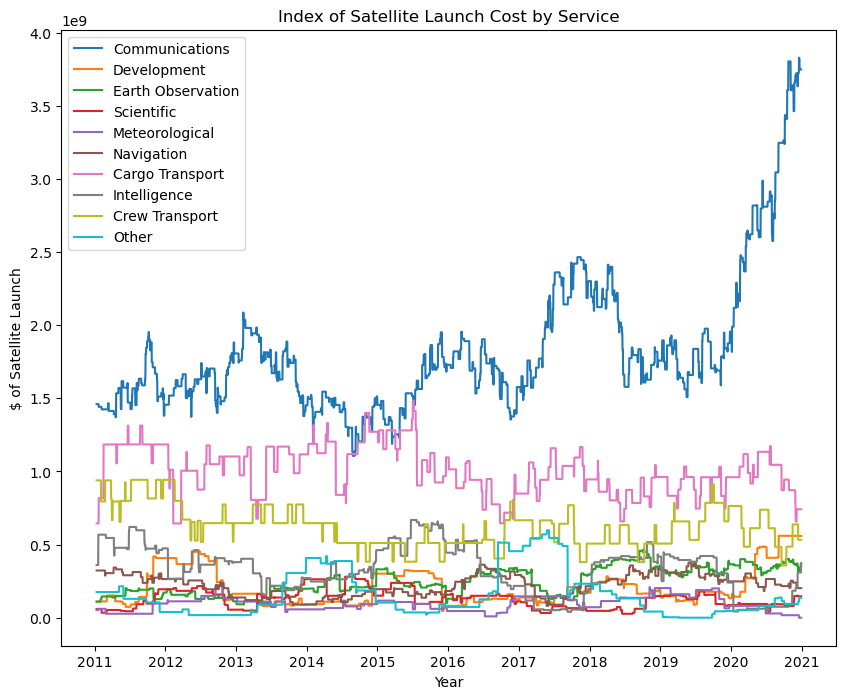

In [99]:
## Now let's plot these different segments
mitre['Launch Date - Actual from Launch Events'] = pd.to_datetime(mitre['Launch Date - Actual from Launch Events'])
true_idx = pd.date_range(mitre['Launch Date - Actual from Launch Events'].sort_values().values[0], mitre['Launch Date - Actual from Launch Events'].sort_values().values[-1])
segment_series = [mitre.loc[mitre['segment'] == seg, ['Launch Date - Actual from Launch Events', 'total cost', 'segment']] for seg in segments]
segment_series = [series.groupby('Launch Date - Actual from Launch Events').sum(numeric_only = True) for series in segment_series]
segment_series = [series.sort_index() for series in segment_series]
segment_series = [series.reindex(true_idx, fill_value = 0.0) for series in segment_series]

segment_index =  [(seg, series['total cost'].rolling('360d', min_periods = None).sum()[360:]) for seg, series in zip(segments, segment_series)]


for index in segment_index:
    plt.plot(index[1], label = index[0])

plt.legend()
plt.xlabel("Year")
plt.ylabel("$ of Satellite Launch")
plt.title("Index of Satellite Launch Cost by Service")
fig = plt.gcf()
fig.set_size_inches((10, 8))


### Note that this proxy for the space economy can be a little shortsighted since it only fixates on the costs associated with launching, if instead we could create a model to valuate the spaceflight, we might have a better proxy for measuring the progression of the space economy. The reason for this is that costs are constantly being improved by the launch providers, so we might see an uptick in the valuation of space assets being deployed, but this might not be reflected if costs are decreasing at a similar rate. 


